In [ ]:
#Scatter Plot Hate Crime Rate vs Foreign Born Rate


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

In [6]:
hate_crime_csv = "./Resources/hate_crime_by_county_2012-2016_final.csv"
foreign_csv = "./Resources/census_immig.csv"

hate_crime_df = pd.read_csv(hate_crime_csv)
foreign_df = pd.read_csv(foreign_csv)


In [7]:
hate_crime_df['2012-2016 Combined Crime Rate'] = round(hate_crime_df["Total Crimes"].astype("float") / hate_crime_df["Population"] * 100000,3)
hate_crime_df = hate_crime_df[["FIPS","2012-2016 Combined Crime Rate"]]
hate_crime_df = hate_crime_df.loc[hate_crime_df['2012-2016 Combined Crime Rate'] != 0.0]

hate_crime_df.tail()

,FIPS,2012-2016 Combined Crime Rate
1185,55109,1.153
1186,55117,2.603
1187,55133,0.506
1188,56005,12.378
1189,56007,6.371


In [8]:
foreign_df = foreign_df[["combined_fips","ForeignBorn_Rate"]]
foreign_df = foreign_df.rename(columns={'combined_fips': 'FIPS'})
foreign_df.head()

,FIPS,ForeignBorn_Rate
0,1001,1.838362
1,1003,3.269510
2,1005,2.859397
3,1007,1.351232
4,1009,4.271801


In [9]:
hate_vs_foreign = pd.merge(hate_crime_df, foreign_df, on="FIPS", how="left")
hate_vs_foreign.tail()

,FIPS,2012-2016 Combined Crime Rate,ForeignBorn_Rate
1098,55109,1.153,2.453705
1099,55117,2.603,5.754366
1100,55133,0.506,4.902410
1101,56005,12.378,3.645328
1102,56007,6.371,5.198777


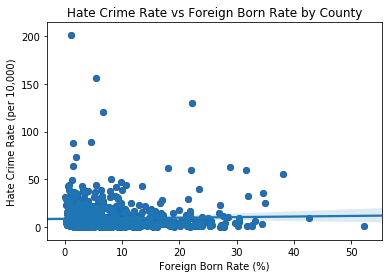

In [62]:
crime_rate = hate_vs_foreign["2012-2016 Combined Crime Rate"]
foreign = hate_vs_foreign["ForeignBorn_Rate"]

plt.clf()
plt.scatter(foreign, crime_rate, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=foreign, y=crime_rate, data=hate_vs_foreign);
#plt.ylim(200,625)
#plt.xlim(13,25)
plt.title("Hate Crime Rate vs Foreign Born Rate by County")
plt.ylabel("Hate Crime Rate (per 10,000)")
plt.xlabel("Foreign Born Rate (%)")
plt.savefig("Crime-vs-Foreign.png")
plt.show()


In [15]:
poverty_df = pd.read_csv(foreign_csv)
poverty_df = poverty_df[["combined_fips","Poverty Rate"]]
poverty_df = poverty_df.rename(columns={'combined_fips': 'FIPS'})
poverty_df.head()

,FIPS,Poverty Rate
0,1001,12.165525
1,1003,12.806877
2,1005,23.427519
3,1007,15.018607
4,1009,16.361084


In [16]:
crime_vs_poverty = pd.merge(hate_crime_df, poverty_df, on="FIPS", how = "left")
crime_vs_poverty.tail()

,FIPS,2012-2016 Combined Crime Rate,Poverty Rate
1098,55109,1.153,5.593478
1099,55117,2.603,8.625042
1100,55133,0.506,5.100701
1101,56005,12.378,8.041590
1102,56007,6.371,13.589450


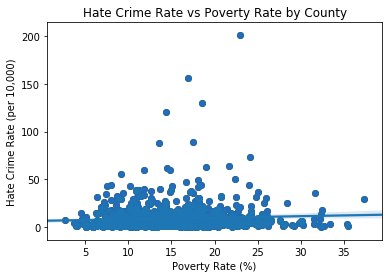

In [61]:
crime_rate = crime_vs_poverty["2012-2016 Combined Crime Rate"]
poverty = crime_vs_poverty["Poverty Rate"]

plt.clf()

plt.scatter(poverty, crime_rate, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=poverty, y=crime_rate, data=crime_vs_poverty);

#plt.ylim(200,625)
#plt.xlim(13,25)

plt.title("Hate Crime Rate vs Poverty Rate by County")
plt.ylabel("Hate Crime Rate (per 10,000)")
plt.xlabel("Poverty Rate (%)")
plt.savefig("Crime-vs-Poverty.png")
plt.show()

In [21]:
income_df = pd.read_csv(foreign_csv)
income_df = income_df[["combined_fips","Household Income"]]
income_df = income_df.rename(columns={'combined_fips': 'FIPS'})
income_df.head()

,FIPS,Household Income
0,1001,53099.0
1,1003,51365.0
2,1005,33956.0
3,1007,39776.0
4,1009,46212.0


In [22]:
crime_vs_income = pd.merge(hate_crime_df, income_df, on="FIPS", how = "left")
crime_vs_income.tail()

,FIPS,2012-2016 Combined Crime Rate,Household Income
1098,55109,1.153,73743.0
1099,55117,2.603,54392.0
1100,55133,0.506,78268.0
1101,56005,12.378,80822.0
1102,56007,6.371,56972.0


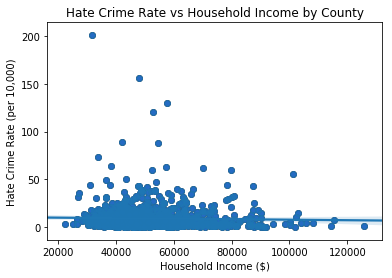

In [58]:
crime_rate = crime_vs_income["2012-2016 Combined Crime Rate"]
income = crime_vs_income["Household Income"]

plt.clf()


plt.scatter(income, crime_rate, marker="o", facecolors="blue", edgecolors="black",
            linewidth=1, alpha=0.75)
sns.regplot(x=income, y=crime_rate, data=crime_vs_income);

#plt.ylim(200,625)
#plt.xlim(13,25)
plt.title("Hate Crime Rate vs Household Income by County")
plt.ylabel("Hate Crime Rate (per 10,000)")
plt.xlabel("Household Income ($)")
plt.savefig("Crime-vs-Income.png")
plt.show()
